In [1]:
# Add parent directory to path
import sys
sys.path.insert(0, '../src')

# Import the generator
from topomap import TopomapGenerator, create_gradient_scaling

# Import ridge_map library
from ridge_map import RidgeMap
from ridge_map import FontManager

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from IPython.display import Image, display

# Set up matplotlib for high-quality output
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

# Create the generator instance
generator = TopomapGenerator(output_dir="../output")

✅ Elevation data fetched: (80, 300)
   80 lines × 300 points per line

Generating plot...

✅ Map saved: ../output/marseille_ridgemap_classic.png


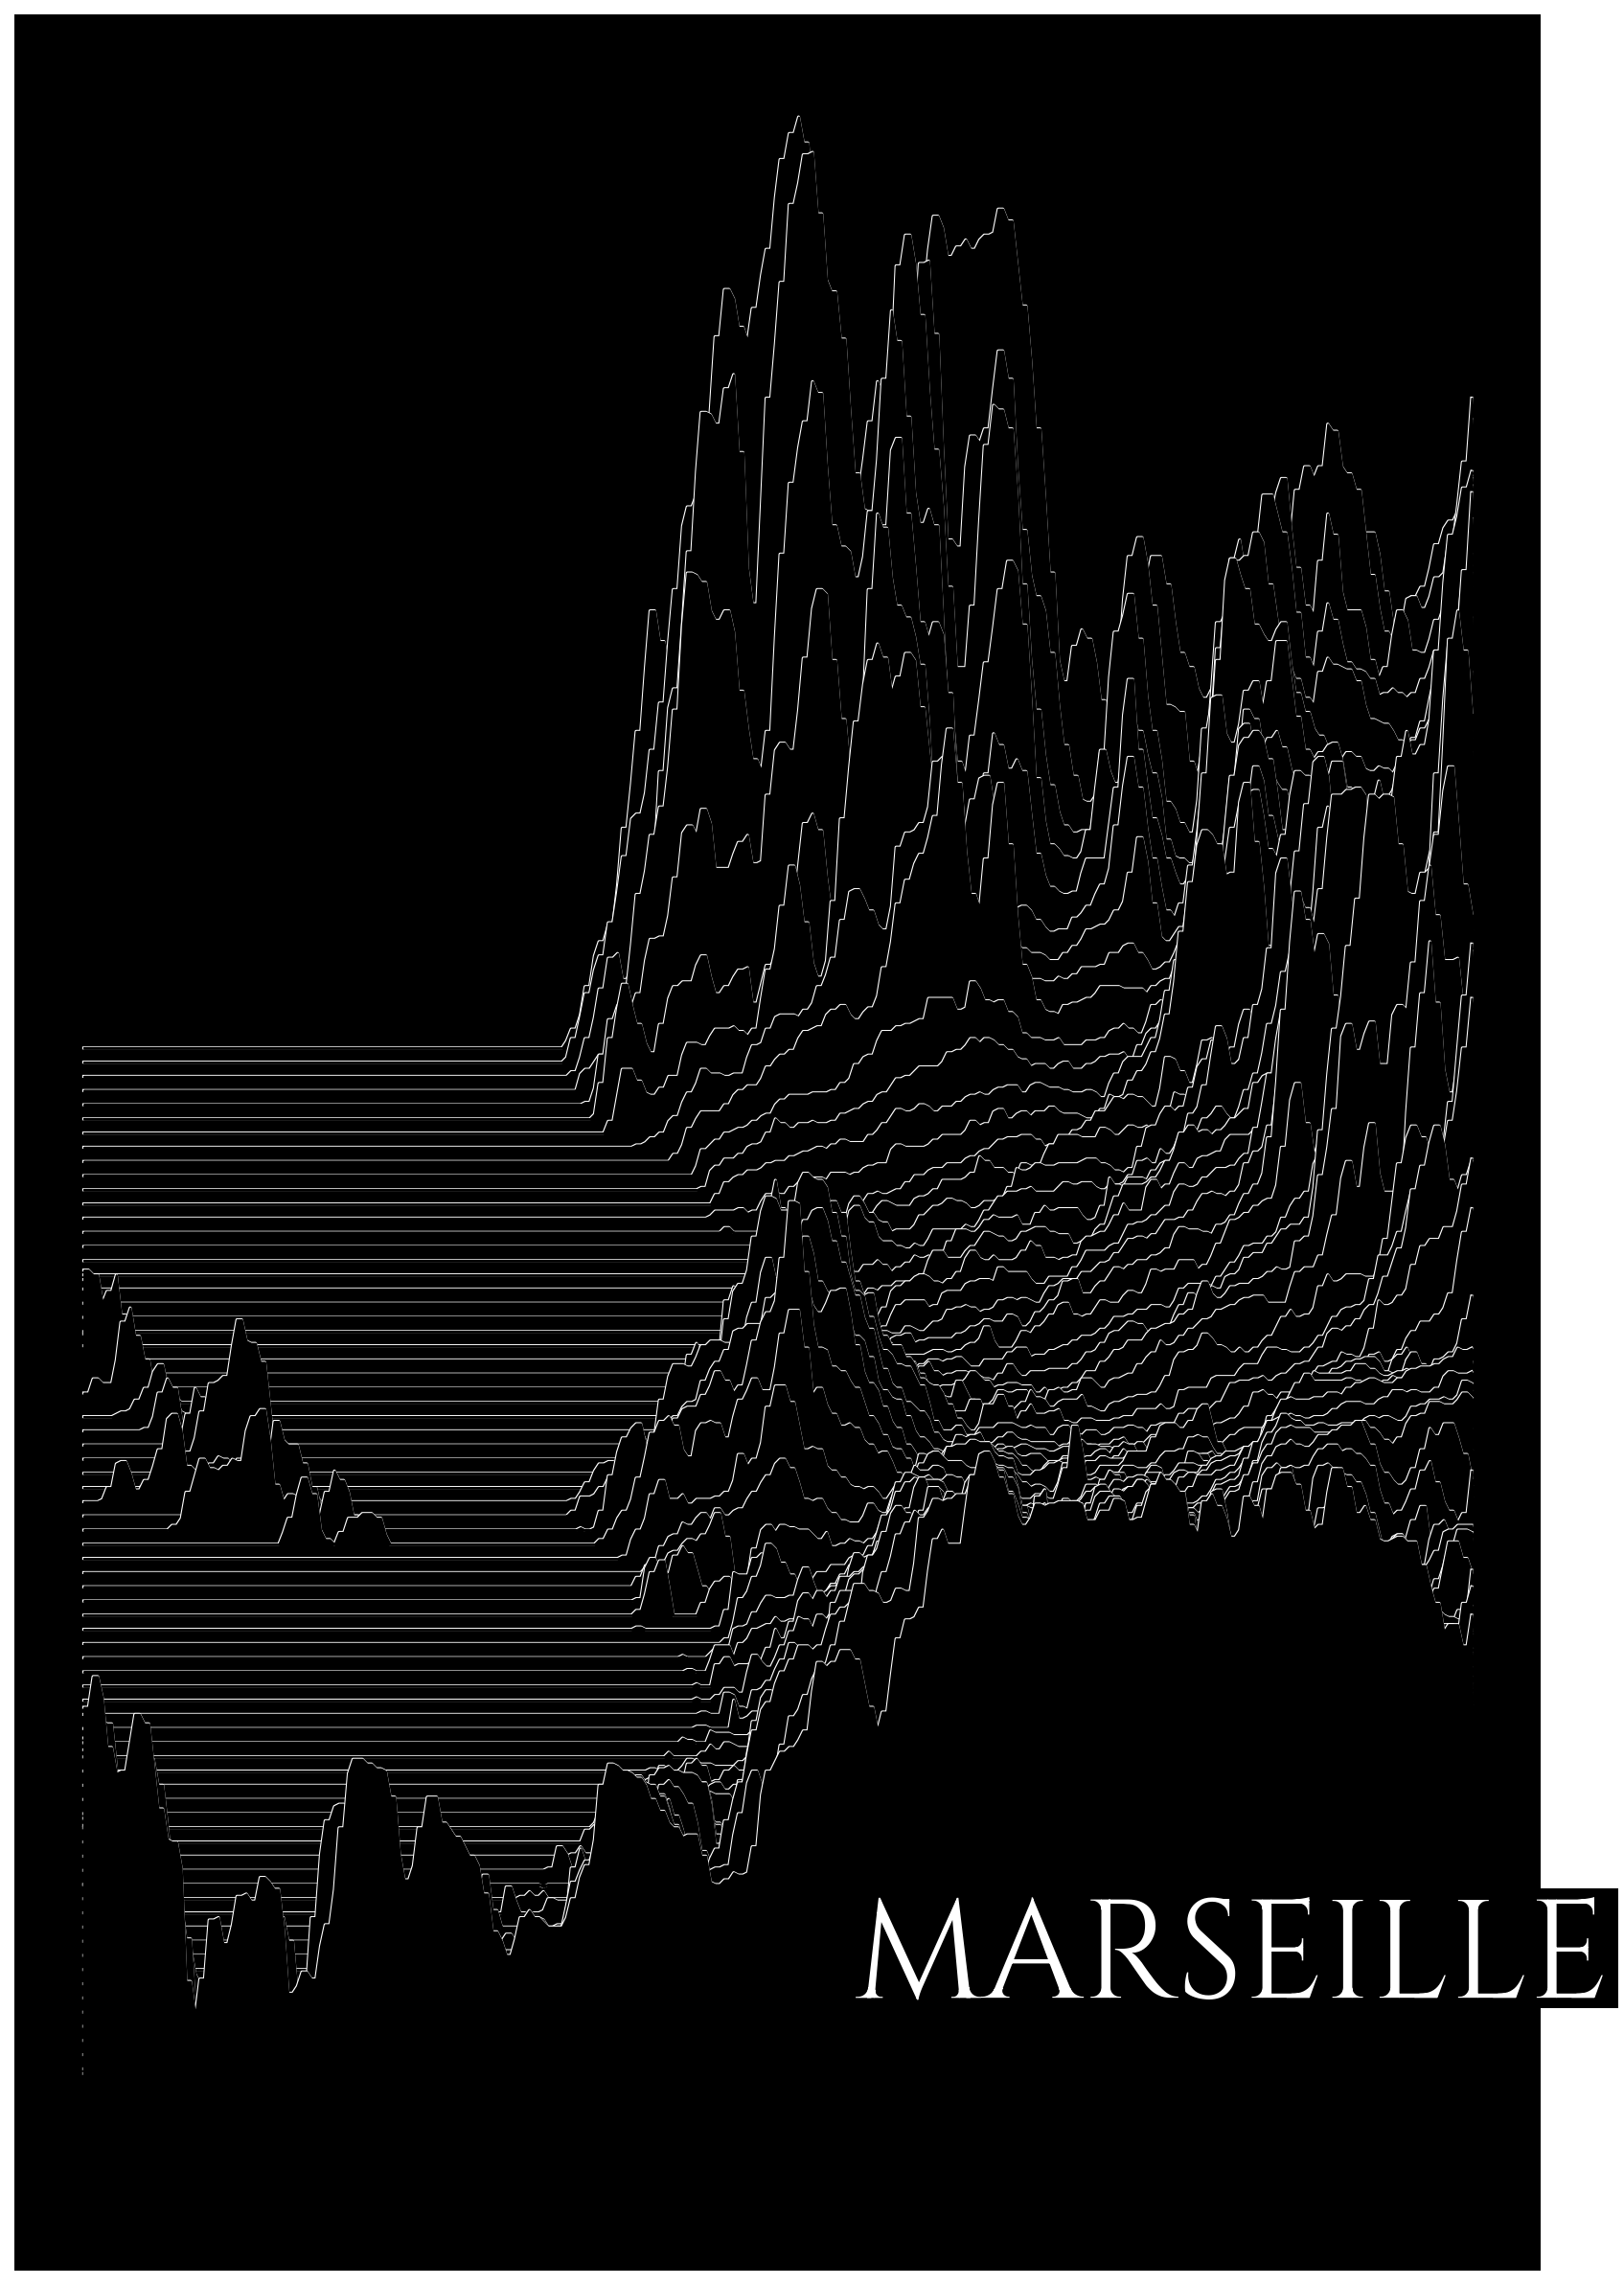

In [2]:
# Define bounding box for Marseille city center
# Center: 43.2965°N, 5.3698°E
# Approximately 15km x 15km area (~0.15 degrees)
marseille_bbox = (5.29, 43.22, 5.45, 43.37)

# Create RidgeMap instance
rm = RidgeMap(bbox=marseille_bbox)

# Get elevation data
values = rm.get_elevation_data(
    num_lines=80,           # 80 ridgelines
    elevation_pts=300       # 300 points per line
)

print(f"✅ Elevation data fetched: {values.shape}")
print(f"   {values.shape[0]} lines × {values.shape[1]} points per line")
print("\nGenerating plot...\n")

# Create the classic Joy Division plot
fig, ax = plt.subplots(figsize=(12, 16))

rm.plot_map(
    values=values,
    label='MARSEILLE',          # Title text
    label_x=0.55,               # Center horizontally
    label_y=0.12,               # Position from bottom
    label_size=70,              # Large title
    line_color='white',         # White lines (classic!)
    background_color='black',   # Black background
    kind='elevation',           # Uniform line style
    linewidth=1.5,             # Medium line width
    ax=ax
)

plt.tight_layout()
output_path = "../output/marseille_ridgemap_classic.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='black')
print(f"✅ Map saved: {output_path}")

plt.show()

In [ ]:
# Reuse the same RidgeMap instance and elevation data
fig, ax = plt.subplots(figsize=(12, 16))

rm.plot_map(
    values=values,
    label='MARSEILLE',
    label_x=0.55,
    label_y=0.12,
    label_size=70,
    line_color='black',            # Black lines
    background_color='white',      # White background
    kind='elevation',
    linewidth=1.5,
    ax=ax
)

plt.tight_layout()
output_path_inverted = "../output/marseille_ridgemap_inverted.png"
plt.savefig(output_path_inverted, dpi=300, bbox_inches='tight', facecolor='white')

display(Image(filename=output_path, width=600))

display(Image(filename=output_path_inverted, width=600))

plt.show()

In [ ]:
calanques_bbox = (5.38, 43.15, 5.52, 43.25)

# Create RidgeMap for Calanques
rm_calanques = RidgeMap(bbox=calanques_bbox)

# Get elevation data with more detail
calanques_values = rm_calanques.get_elevation_data(
    num_lines=100,          # More lines for rugged terrain
    elevation_pts=400       # High resolution
)

# Create plot with cyan on dark blue (Mediterranean feel)
fig, ax = plt.subplots(figsize=(12, 16))

rm_calanques.plot_map(
    values=calanques_values,
    label='LES\nCALANQUES',
    label_x=0.60,
    label_y=0.15,
    label_size=60,
    label_verticalalignment='bottom',
    line_color='#00ffff',                    # Cyan (bright blue)
    background_color=(0.04, 0.05, 0.15),    # Dark navy blue (RGB)
    kind='elevation',
    linewidth=1.2,
    ax=ax
)

plt.tight_layout()
output_calanques = "../output/marseille_calanques_ridgemap.png"
plt.savefig(output_calanques, dpi=300, bbox_inches='tight', 
            facecolor=(0.04, 0.05, 0.15))
display(Image(filename=output_calanques, width=700))
plt.show()

## 6️⃣ Colorful Variations - Modern Joy Division

While the classic style is black & white, Joy Division ridgelines look amazing in color too!

Let's create several colorful variations of Marseille:
- 🟢 **Neon Green** - Matrix/retro feel
- 🔴 **Hot Magenta** - Bold and striking  
- 🔵 **Electric Blue** - Cool and modern
- 🟠 **Sunset Orange** - Warm and inviting
- 🟣 **Purple Haze** - Classic with a twist

Each uses the same location but different color schemes.

In [ ]:
# Define colorful schemes (line_color, background_color)
color_schemes = {
    "Neon Green": {
        "line": "#00ff00", 
        "bg": "black"
    },
    "Hot Magenta": {
        "line": "#ff1493", 
        "bg": (0.05, 0.01, 0.13)  # Dark purple
    },
    "Electric Blue": {
        "line": "#7fdbff", 
        "bg": (0, 0.12, 0.25)  # Navy
    },
    "Sunset Orange": {
        "line": "#ff6b35", 
        "bg": (0.1, 0.06, 0.06)  # Dark brown
    },
    "Purple Haze": {
        "line": "#da70d6", 
        "bg": (0.17, 0.11, 0.30)  # Dark purple
    },
}

colorful_maps = []

for name, colors in color_schemes.items():

    
    fig, ax = plt.subplots(figsize=(12, 16))
    
    rm.plot_map(
        values=values,  # Reuse Marseille elevation data
        label='MARSEILLE',
        label_x=0.55,
        label_y=0.12,
        label_size=70,
        line_color=colors['line'],
        background_color=colors['bg'],
        kind='elevation',
        linewidth=1.5,
        ax=ax
    )
    
    plt.tight_layout()
    output_path = f"../output/marseille_ridgemap_{name.lower().replace(' ', '_')}.png"
    
    # Get background color for saving
    bg_color = colors['bg'] if isinstance(colors['bg'], str) else colors['bg']
    plt.savefig(output_path, dpi=250, bbox_inches='tight', facecolor=bg_color)
    
    colorful_maps.append((name, output_path))
    print(f"  ✅ Saved: {output_path}\n")
    plt.close()

for name, path in colorful_maps:
    display(Image(filename=path, width=500))

## 7️⃣ Advanced: Gradient Line Style

**ridge_map** supports a `'gradient'` line kind that creates a beautiful fading effect!

Instead of uniform line width, the gradient style:
- Makes lines fade based on elevation
- Creates a watercolor-like effect
- Adds artistic depth

Let's compare `'elevation'` vs `'gradient'` styles:

In [ ]:
# Create gradient scaling factors
num_lines = 70
scaling_factors = create_gradient_scaling(
    num_lines, 
    start=0.4,      # Start at 40% exaggeration
    end=1.6,        # End at 160% exaggeration
    style='ease_out'  # Gradual change at start, faster at end
)

marseille_gradient = generator.generate(
    latitude=43.2965,
    longitude=5.3698,
    size_km=15,
    resolution=100,
    num_lines=num_lines,
    exaggeration=4.5,
    scaling_factors=scaling_factors,  # Apply gradient!
    output_filename="marseille_joydivision_gradient.png",
    
    # Golden color scheme
    bg_color='#1a1a2e',      # Dark background
    line_color='#ffd700',    # Gold
    line_width=1.6,
    fill_below=True,
    
    skip_zero_elevation=True,
    smoothing=True,
    figsize=(12, 16),
    dpi=300
)

display(Image(filename=marseille_gradient, width=700))

fig, ax = plt.subplots(figsize=(12, 16))

rm.plot_map(
    values=values,
    label='MARSEILLE',
    label_x=0.55,
    label_y=0.12,
    label_size=70,
    line_color='#ffd700',              # Gold
    background_color=(0.1, 0.1, 0.18), # Dark blue-gray
    kind='gradient',                   # Gradient style!
    linewidth=2.0,                     # Slightly thicker
    ax=ax
)

plt.tight_layout()
output_gradient = "../output/marseille_ridgemap_gradient.png"
plt.savefig(output_gradient, dpi=300, bbox_inches='tight', 
            facecolor=(0.1, 0.1, 0.18))

display(Image(filename=output_path, width=550))

display(Image(filename=output_gradient, width=550))

plt.show()

## 8️⃣ Comparing Line Density

The number of lines dramatically affects the final look:
- **Few lines (30-40)** - Abstract, minimalist, bold
- **Medium lines (50-70)** - Balanced, readable
- **Many lines (80-100+)** - Dense, detailed, complex

Let's compare three densities for the same location:

## 9️⃣ Advanced: Adding Annotations

One of the powerful features of `ridge_map` is the ability to **add annotations** to mark specific locations!

Let's create a ridge map with labeled points of interest around Marseille:
- 🗼 **Notre-Dame de la Garde** - Iconic basilica
- 🏔️ **Mont Puget** - Highest peak in Marseille
- 🌊 **Calanque de Sormiou** - Famous inlet

In [ ]:
fig, ax = plt.subplots(figsize=(14, 18))

# Plot the base map
rm.plot_map(
    values=values,
    label='MARSEILLE',
    label_x=0.55,
    label_y=0.10,
    label_size=80,
    line_color='white',
    background_color='black',
    kind='elevation',
    linewidth=1.5,
    ax=ax
)

# Add annotations for points of interest
# Notre-Dame de la Garde (iconic basilica)
rm.plot_annotation(
    label='Notre-Dame\nde la Garde',
    coordinates=(5.3709, 43.2842),
    x_offset=0.05,
    y_offset=0.02,
    label_size=16,
    annotation_size=10,
    color='white',
    background=True,
    ax=ax
)

# Calanque de Sormiou (famous inlet)
rm.plot_annotation(
    label='Calanque de\nSormiou',
    coordinates=(5.4233, 43.2086),
    x_offset=-0.15,
    y_offset=-0.01,
    label_size=14,
    annotation_size=8,
    color='white',
    background=True,
    ax=ax
)

plt.tight_layout()
output_annotated = "../output/marseille_ridgemap_annotated.png"
plt.savefig(output_annotated, dpi=300, bbox_inches='tight', facecolor='black')

display(Image(filename=output_annotated, width=700))
plt.show()

In [ ]:
# Compare different line densities
densities = {
    "Minimalist": 40,
    "Balanced": 80,
    "Dense": 120
}

density_maps = []

for name, num_lines in densities.items():
    
    # Fetch new elevation data with different num_lines
    density_values = rm.get_elevation_data(
        num_lines=num_lines,
        elevation_pts=300
    )
    
    fig, ax = plt.subplots(figsize=(12, 16))
    
    rm.plot_map(
        values=density_values,
        label='MARSEILLE',
        label_x=0.55,
        label_y=0.12,
        label_size=70,
        line_color='white',
        background_color=(0.17, 0.11, 0.30),  # Purple
        kind='elevation',
        linewidth=1.5,
        ax=ax
    )
    
    plt.tight_layout()
    output_path = f"../output/marseille_ridgemap_density_{name.lower()}.png"
    plt.savefig(output_path, dpi=250, bbox_inches='tight', 
                facecolor=(0.17, 0.11, 0.30))
    
    density_maps.append((name, num_lines, output_path))
    print(f"  ✅ Saved: {output_path}\n")
    plt.close()


# Display comparison
for name, num_lines, path in density_maps:
    display(Image(filename=path, width=500))